# LAB 3 - Information Security

Members:
* Andrea Andreozzi - 2163406
* Riccardo Scalco - 2155352
* Sergio Cibecchini - 2155353
* Luca Ferrari - 2166294

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import random

## Task 1

We declare $M$ and $K$ ad the length of $u$ and $k$ respectively. We find at random $u$ and $k$ and then we compute $t$.

In [ ]:
M = 50
K = 30

In [ ]:
u = ''.join(random.choice(['0', '1']) for _ in range(M))
k = ''.join(random.choice(['0', '1']) for _ in range(K))

print(f"u: {u}")
print(f"k: {k}")

u: 01010110101101011101111100000110101011000111000000
k: 110011010101100001001011010011


In [ ]:
def sum_digits(num):
    return sum(int(digit) for digit in str(num))

In [ ]:
# t = T(k;u)
def generate_tag(u, k):
    int_u = int(u, 2)
    int_k = int(k, 2)

    somma_u = sum_digits(int_u)
    somma_k = sum_digits(int_k)

    t = somma_u * somma_k
    t = bin(t)[2:]
    return t

In [ ]:
# x = append (u,t)
def sign_message(u, k):
    t = generate_tag(u, k)
    x = str(u) + str(t)
    return x

In [ ]:
def verify_tag(x, k):
    u_received = x[:M]
    t_received = x[M:]
    t = generate_tag(u_received, k)
    b = t_received != t
    return u_received, int(b)

In [ ]:
x = sign_message(u, k)
print(f"x: {x}")
u_received, b = verify_tag(x, k)
print(f"u_received: {u_received}")
print(f"b: {b} (0 -> correct, 1 -> incorrect)")

x: 01010110101101011101111100000110101011000111000000100011110111
u_received: 01010110101101011101111100000110101011000111000000
b: 0 (0 -> correct, 1 -> incorrect)


PLOT 1: fixed $K=5000$ bits, variable length of $M$.

In [ ]:
def computational_evaluation(u, k, num_iterations):
    total_send_time = 0
    total_received_time = 0
    for _ in range(num_iterations):
        start_time = time.time()
        x = sign_message(u, k)
        end_time = time.time()
        total_send_time += end_time - start_time
        start_time = time.time()
        u_received, b = verify_tag(x, k)
        end_time = time.time()
        total_received_time += end_time - start_time

    return total_send_time / num_iterations, total_received_time / num_iterations

In [ ]:
def plot_computational_evaluation(send_times, received_times, format_string):
    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    message_sizes = list(send_times.keys())
    send_avg_times = list(send_times.values())
    received_avg_times = list(received_times.values())

    # Send times plot
    ax1.plot(message_sizes, send_avg_times, '-o', label='Send Time', color='tab:blue')
    ax1.set_title(f'Average Send Time vs {format_string} Size')
    ax1.set_xlabel(f'{format_string} Size (bits)')
    ax1.set_ylabel('Average Time (seconds)')
    ax1.grid(True)
    ax1.legend()

    # Received times plot
    ax2.plot(message_sizes, received_avg_times, '-o', label='Verify Time', color='tab:green')
    ax2.set_title(f'Average Verification Time vs {format_string} Size')
    ax2.set_xlabel(f'{format_string} Size (bits)')
    ax2.set_ylabel('Average Time (seconds)')
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

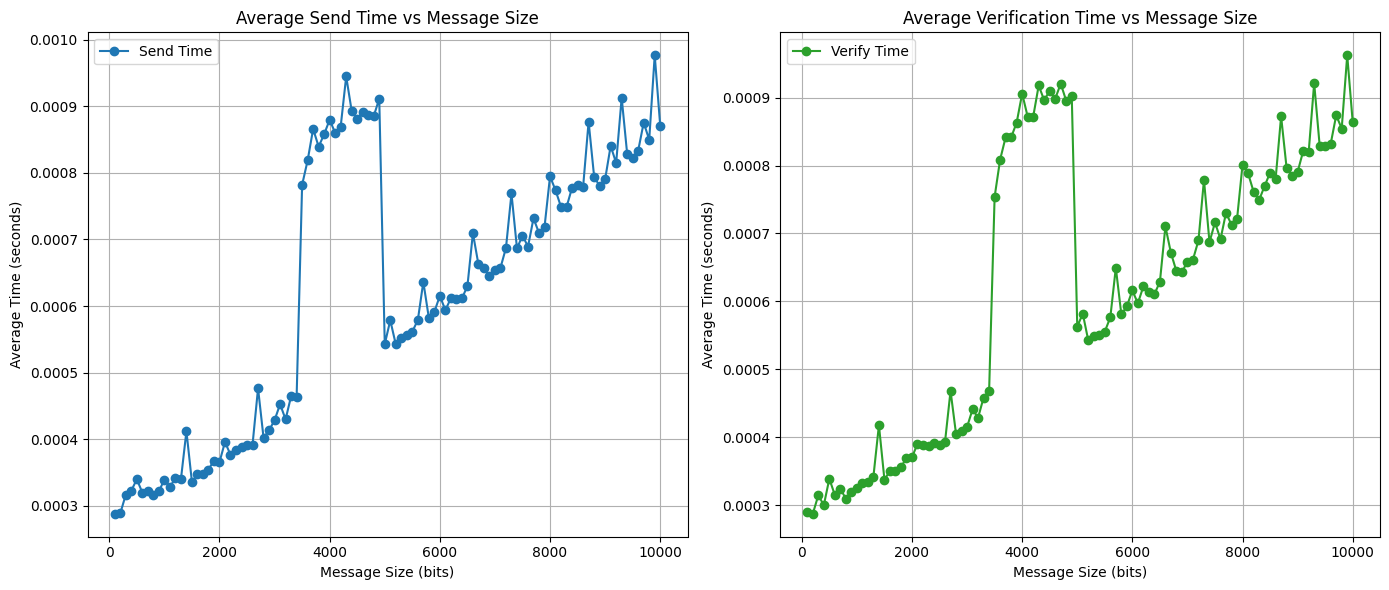

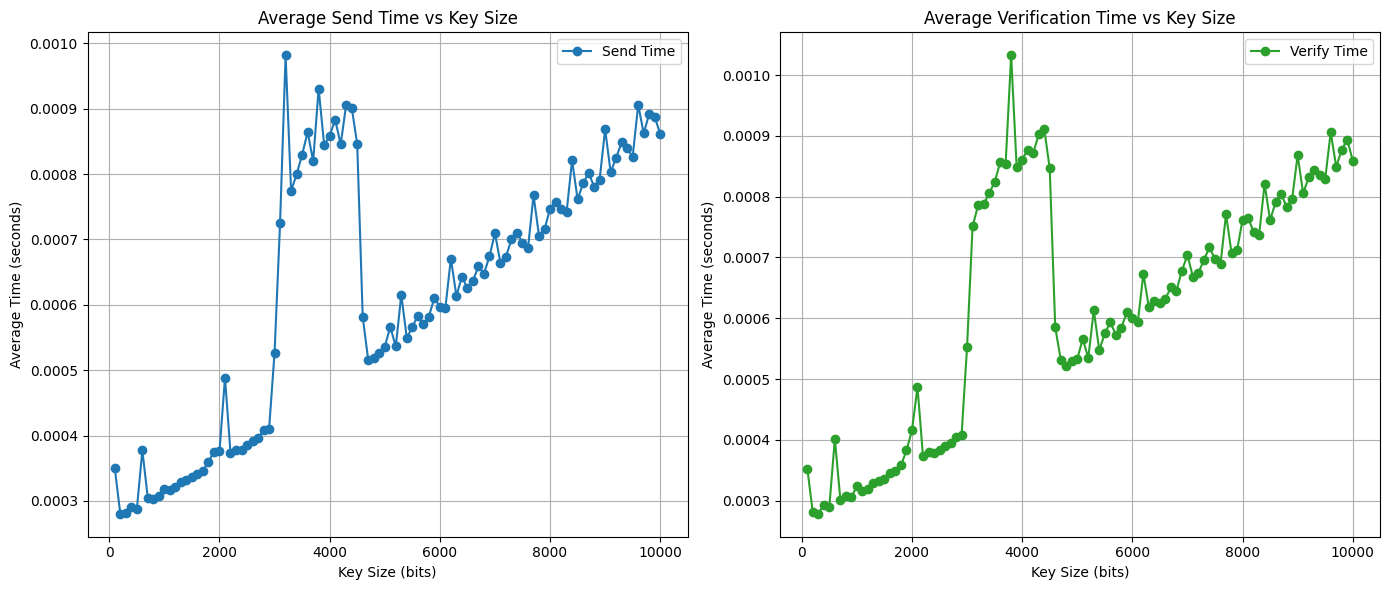

In [ ]:
num_iterations = 100

K = 5000
k = ''.join(random.choice(['0', '1']) for _ in range(K))
send_times = {}
received_times = {}
for M in range(100, 10001, 100):
    u = ''.join(random.choice(['0', '1']) for _ in range(M))
    send_time, received_time = computational_evaluation(u, k, num_iterations)
    send_times[M] = send_time
    received_times[M] = received_time
plot_computational_evaluation(send_times, received_times, "Message")

M = 5000
u = ''.join(random.choice(['0', '1']) for _ in range(M))
send_times = {}
received_times = {}
for K in range(100, 10001, 100):
    k = ''.join(random.choice(['0', '1']) for _ in range(K))
    send_time, received_time = computational_evaluation(u, k, num_iterations)
    send_times[K] = send_time
    received_times[K] = received_time
plot_computational_evaluation(send_times, received_times, "Key")

## TASK 2

In [ ]:
M = 50
K = 30

new_u = ''.join(random.choice(['0', '1']) for _ in range(M))

u = ''.join(random.choice(['0', '1']) for _ in range(M))
k = ''.join(random.choice(['0', '1']) for _ in range(K))

x = sign_message(u,k)

print(f"u: {u}")
print(f"k: {k}")

u: 00110010011101011100011111000110100101100100110110
k: 000101100001100111111101001111


In [ ]:
def substitution_attack(x, new_u):
    u_received = x[:M]
    t_received = x[M:]

    u = int(u_received, 2)
    t = int(t_received, 2)

    sum_u = sum_digits(u)

    coeff = int(t / sum_u)

    sum_new_u = sum_digits(int(new_u, 2))
    new_tag = coeff * sum_new_u
    new_tag = bin(new_tag)[2:]
    x_new  = str(new_u) + str(new_tag)
    return x_new

In [ ]:
new_x = substitution_attack(x, new_u)
print(f"new_x: {new_x}")
u_received, b = verify_tag(new_x, k)
print(f"u_received: {u_received}")
print(f"b: {b} (0 -> correct, 1 -> incorrect)")

new_x: 01010110000111010001000000110101100111101011000111101000100000
b: 0
u_received: 01010110000111010001000000110101100111101011000111
b: 0 (0 -> correct, 1 -> incorrect)
